The Bias-Variance Tradeoff
==========================

We introduce the bias-variance perspective of learning with examples.  The derivations will be intentionally drawn out to be as illustrative as possible.

Objective 
---------

Supervised learning is a function approximation problem.  For each data point $x$, there is some target $f(x)$.  We want to approximate the unknown function $f$ with our own function $g$.

To select the right $g$, it is useful to consider the $\textit{expected prediction error}$ (EPE) of $g$ over all data points $x$:

$$
\mathrm{EPE}(g) = \mathrm{E}_x \left[ L(g(x), f(x)) \right]
$$

Bias and variance can be cleanly separated when $L$ is squared error, but the theory is general.  With this loss function, we have:

$$
\mathrm{EPE}(g) = \mathrm{E}_x \left[ (g(x) -f(x))^2 \right]
$$

The final model $g$ in fact depends on its training set $\mathcal{D} \subseteq X$.  We don't want our EPE to depend on the training set, so we must average the prediction error over all training sets $\mathcal{D}$ of the same size.

$$\mathrm{E}_{\mathcal{D}} \left[ \mathrm{EPE}(g) \right] = \mathrm{E}_{\mathcal{D}} \left[ \mathrm{E}_x \left[ (g^{(\mathcal{D})}(x) -f(x))^2 \right] \right]$$

The Average Model
-----------------

We will need to use the "average model" $\bar{g}$:

$$
\bar{g}(x) = E_{D} \left[ g^{(\mathcal{D})}(x) \right]
$$

$x$ here is a $single$ data point.  This means that $\bar{g}$ is the average prediction for $x$, over all models learned from all training sets $\mathcal{D}$  This is not necessarily a good model, a valid $g$, or even calculable, but it is a useful quantity to estimate nonetheless.


Bias-Variance Decomposition
-----------------------------

Now let's break down the expected prediction error.  We can swap $\mathrm{E}_x$ and $\mathrm{E}_{\mathcal{D}}$, since the current test point $x$ and the training set $\mathcal{D}$ are independent of each other (we test on all $x$).

$$
\begin{gather}
\mathrm{E}_{\mathcal{D}} \left[ \mathrm{EPE}(g) \right] &= \mathrm{E}_{\mathcal{D}} \left[ \mathrm{E}_x \left[ (g^{(\mathcal{D})}(x) -f(x))^2 \right] \right] \\
&= \mathrm{E}_x \left[ \mathrm{E}_{\mathcal{D}} \left[ (g^{(\mathcal{D})}(x) -f(x))^2 \right] \right]
\end{gather}
$$

Inserting $\bar{g}(x)$, we get the following equation for $EPE$:

$$
\begin{align}
\mathrm{E}_{\mathcal{D}} \left[ \mathrm{EPE}(g) \right] &= \mathrm{E}_x \left[ 
\mathrm{E}_{\mathcal{D}} \left[ \left( g^{(\mathcal{D})}(x) - \bar{g}(x) + \bar{g}(x) -f(x) \right) ^2 \right] \right] \\
&= \mathrm{E}_x \left[ 
\mathrm{E}_{\mathcal{D}} \left[ \left( (g^{(\mathcal{D})}(x) - \bar{g}(x)) + (\bar{g}(x) -f(x)) \right)^2 \right] \right] \\
&= \mathrm{E}_x \left[ 
\mathrm{E}_{\mathcal{D}} \left[ \left( g^{(\mathcal{D})}(x) - \bar{g}(x) \right)^2 + 
\left( \bar{g}(x) -f(x) \right) ^2 + 
2\left(g^{(\mathcal{D})}(x) - \bar{g}(x) \right)\left( \bar{g}(x) - f(x)\right) \right] \right] \\
&= \mathrm{E}_x \left[ 
\mathrm{E}_{\mathcal{D}} \left[ \left( g^{(\mathcal{D})}(x) - \bar{g}(x) \right)^2 \right] +  \mathrm{E}_{\mathcal{D}} \left[ \left( \bar{g}(x) -f(x) \right) ^2 \right] + 
\mathrm{E}_{\mathcal{D}} \left[ 2\left(g^{(\mathcal{D})}(x) - \bar{g}(x) \right) \left( \bar{g}(x) - f(x) \right) \right] \right]
\end{align}
$$

Thankfully, by using the definition of \bar{g}, the cross-terms evaluate to 0:

$$
\begin{align}
\mathrm{E}_{\mathcal{D}} \left[ 2\left(g^{(\mathcal{D})}(x) - \bar{g}(x) \right) \left( \bar{g}(x) - f(x) \right) \right]
&= 2 * \left( \mathrm{E}_{\mathcal{D}} \left[ g^{(\mathcal{D})}(x) \right] - \bar{g}(x) \right) \left( \bar{g}(x) - f(x) \right) \\
&= 2 * \left( \bar{g}(x) - \bar{g}(x) \right) \left( \bar{g}(x) - f(x) \right) \\
&= 0 
\end{align}
$$

Getting back to expected error, we note that $\bar{g}(x)−f(x)$ does not depend on $\mathcal{D}$:

$$
\begin{align}
\mathrm{E}_{\mathcal{D}} \left[ \mathrm{EPE}(g) \right] &= \mathrm{E}_x \left[ 
\mathrm{E}_{\mathcal{D}} \left[ \left( g^{(\mathcal{D})}(x) - \bar{g}(x) \right)^2 \right] +  \mathrm{E}_{\mathcal{D}} \left[ \left( \bar{g}(x) -f(x) \right) ^2 \right] \right] \\
&= \mathrm{E}_x \left[ 
\underbrace{\mathrm{E}_{\mathcal{D}} \left[ \left( g^{(\mathcal{D})}(x) - \bar{g}(x) \right)^2 \right]}_{variance} + 
\underbrace{\left( \bar{g}(x) -f(x) \right) ^2 }_{bias^2}\right]
\end{align}
$$


Bias and Variance
-----------------

Intuitively, the bias-variance decomposition states that the performance of our approximator $g$ depends on:

- How "consistent" the prediction of $g$ is, when $g$ is learned from different subsets of data
- On average, how far is $g$ from $f$ (over all models learned from all datasets $\mathcal{D}$)

We will use two regression examples: $k$-nearest neighbors and linear regression.  To calculate bias, we need to know $f$.  We use $f(x) = h(x) + \epsilon$, where $\epsilon$ is white noise with 0 mean and variance $\sigma^2$.

$k$-Nearest Neighbors
-----------------

The $k$-nearest neighbors algorithm gives predictions in the following way:

$$g^{(\mathcal{D})}(x) = \frac{1}{k} \sum_i^k f(x_i)$$

Here $x_i$ denotes the $i^{th}$ nearest neighbor of $x$ in $\mathcal{D}$.  Since these neighbors are in the training set $\mathcal{D}$, we know their target values $f(x_i)$.  

In order to calculate bias and variance, we need the average model $\bar{g}$. 

$$
\begin{align}
\bar{g}(x) &= E_{D} \left[ g^{(\mathcal{D})}(x) \right] \\
&= E_{\mathcal{D}} \left[ \frac{1}{k} \sum_i^k f(x_i) \right] \\
&= E_{\mathcal{D}} \left[ \frac{1}{k} \sum_i^k (h(x_i) + \epsilon_i) \right] \\
&= E_{\mathcal{D}} \left[ \frac{1}{k} \sum_i^k h(x_i) \right] + E_{\mathcal{D}} \left[ \frac{1}{k} \sum_i^k \epsilon_i \right] \\
&= E_{\mathcal{D}} \left[ \frac{1}{k} \sum_i^k h(x_i) \right] \\
\end{align}
$$

This term is difficult to compute.  Every source I could find, including Hastie's *Elements of Statistical Learning* all consider the neighborhood $x_i$ fixed for each $x$.  Note that this is a **strong** assumption, but mathematically useful, and so we continue with it.  We get:

$$
\bar{g}(x) = \frac{1}{k} \sum_i^k h(x_i)
$$

The bias and variance then are:
$$
\begin{align}
bias^2 &= \left( f(x) - \bar{g}(x) \right) ^2 \\
&= \left( f(x) - \frac{1}{k} \sum_i^k h(x_i) \right) ^2 \\
&= \left( h(x) + \epsilon - \frac{1}{k} \sum_i^k h(x_i) \right) ^2 \\
variance 
&= variance \left( g^{(\mathcal{D})}(x) \right) \\
&= variance \left( \frac{1}{k} \sum_i^k f(x_i) \right)  \\
&= \frac{1}{k^2}  \sum_i^k variance \left( f(x_i) \right)  \\
&= \frac{1}{k^2}  \sum_i^k variance \left( h(x_i) \right) + variance \left( \epsilon_i \right)  \\
&= \frac{1}{k^2}  \sum_i^k variance \left( \epsilon_i \right)  \\
&= \frac{1}{k^2} k \sigma^2  \\
&= \frac{\sigma^2}{k}
\end{align}
$$

Our simplifying assumption on neighborhoods of $x$ means that the only source of variance is from noise $\epsilon$.  In reality, a lot of variance should come from how the neighborhoods change with $\mathcal{D}$.

The overall expected prediction error, then is:

$$
\begin{align}
\mathrm{E}_{\mathcal{D}} \left[ \mathrm{EPE}(g) \right] 
&= \mathrm{E}_x \left[  bias^2 + variance \right] \\
&= \mathrm{E}_x \left[ \left( h(x) + \epsilon - \frac{1}{k} \sum_i^k h(x_i) \right) ^2 + \frac{\sigma^2}{k} \right] \\
&= \mathrm{E}_x \left[ \left( h(x) + \epsilon - \frac{1}{k} \sum_i^k h(x_i) \right) ^2 \right] + \frac{\sigma^2}{k}  \\
&= \mathrm{E}_x \left[ \left( \left(h(x) - \frac{1}{k} \sum_i^k h(x_i) \right) + \epsilon  \right) ^2 \right]  + \frac{\sigma^2}{k}  \\
&= \mathrm{E}_x \left[ \left(h(x) - \frac{1}{k} \sum_i^k h(x_i) \right)^2 + \epsilon^2 + 2\epsilon \left(h(x) - \frac{1}{k} \sum_i^k h(x_i) \right) \right] + \frac{\sigma^2}{k}   \\
&= \mathrm{E}_x \left[ \left(h(x) - \frac{1}{k} \sum_i^k h(x_i) \right)^2 \right] + \mathrm{E}_x \left[ \epsilon^2 \right] + \mathrm{E}_x \left[ 2\epsilon \left(h(x) - \frac{1}{k} \sum_i^k h(x_i) \right) \right] + \frac{\sigma^2}{k}   \\
&= \underbrace{\mathrm{E}_x \left[ \left(h(x) - \frac{1}{k} \sum_i^k h(x_i) \right)^2 \right]}_{(\text{model bias})^2}
+ \underbrace{\frac{\sigma^2}{k}}_{\mathrm{variance}}
+ \underbrace{\sigma^2}_{\text{irreducible error}} \\
\end{align}
$$

Here we see the presence of a new term, the irreducible error, which comes from the bias due to white noise introduced in our data.

How well does this hold up with reality?  We test below with a dataset with $f(x) = -\frac{1}{5}x^3 + \epsilon$, where $\epsilon$ has standard deviation $\sigma=1$.

In [1]:
import numpy as np
from sklearn import neighbors
from matplotlib import pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

Here's our dataset $\mathcal{D}$.

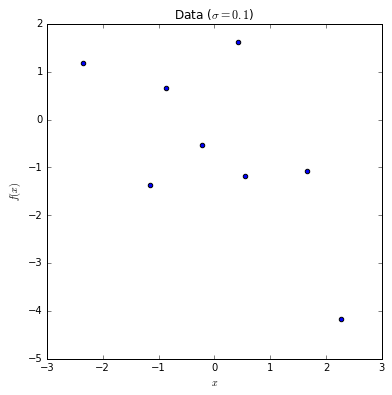

In [2]:
def make_data(n=10, sigma=10, min=-5, max=5, f=lambda x: (-x**3)):
    x  = np.random.uniform(min, max, n)
    noise = np.random.normal(0, sigma, n)
    fx = f(x) + noise
    return (x,fx)

n = 8
f = lambda x: (-x**3)/5
xmin = -3
xmax = 3
sigma = 1.0
(x, fx) = make_data(f=f, n=n, min=xmin, max=xmax, sigma=sigma)
plt.figure(figsize=(6,6))
plt.title('Data ($\sigma=0.1$)')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.scatter(x, fx)
pass

Here are the results of $k$-nearest neighbor regression for several values of $k$.

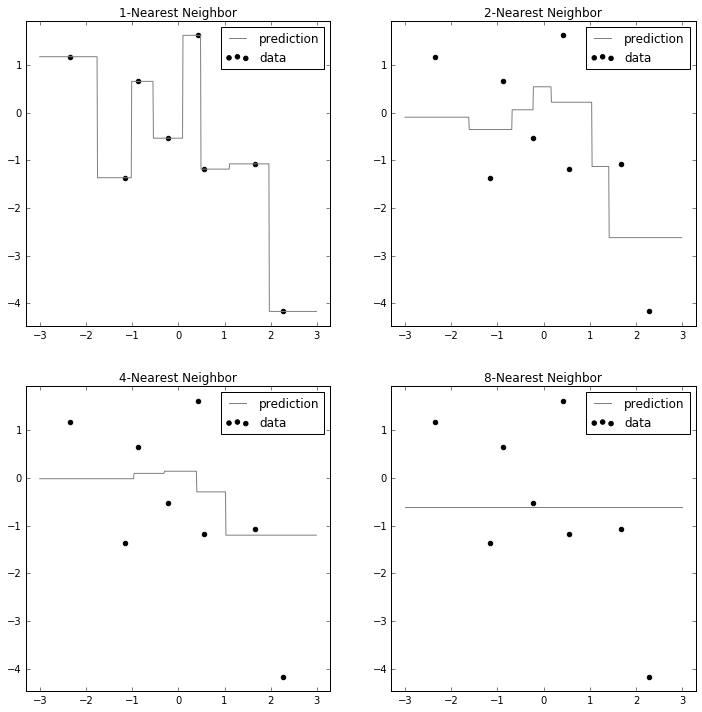

In [3]:
from sklearn import neighbors

x_range = np.arange(xmin,xmax,0.01)

plt.figure(figsize=(10,10))
_, ((p1, p2), (p3, p4)) = plt.subplots(2,2, figsize=(12,12))
subplots = [p1,p2,p3,p4]

for i, k in enumerate([1,2,4,8]):
    knn = neighbors.KNeighborsRegressor(k, weights='uniform')
    y_ = knn.fit(x[:,np.newaxis], fx).predict(x_range[:,np.newaxis])

    subplots[i].scatter(x, fx, c='k', label='data')
    subplots[i].plot(x_range, y_, c='gray', label='prediction')
    subplots[i].axis('tight')
    subplots[i].legend()
    subplots[i].set_title("%i-Nearest Neighbor" % (k))

plt.show()
pass

Since we know our target function $f$, we can generate infinite datasets $\mathcal{D}$ from it.  This allows us to estimate $\bar{g}$ by averaging $k$-NN predictions for many training sets.  With the approximate $\bar{g}$ and $f$, we can calculate bias and variance explicitly.

Before we do so, however, take a look at the plots below.  The blue lines show $\bar{g}$, and the grey lines show $k$nn regressors learned from different training sets $\mathcal{D}$.  Notice the following as $k$ increases:

- The average model $\bar{g}$ gets further from the true function $f$.  Bias increases.
- The predictions of all classifiers $g(x)$ cluster more tightly.  Variance decreases.

How do these observations compare to theory?

Recall that:
$$
\begin{gather}
bias^2 = \left( h(x) - \frac{1}{k} \sum_i^k h(x_i) + \epsilon  \right) ^2 \\
variance = \frac{\sigma^2}{k}
\end{gather}
$$

The formula for variance predicts a sharp drop as $k$ increases.  

What about bias?  Note that increasing $k$ means adding new $x_i$.  Each $x_i$ is further from the true $x$ than the previous.  This means that the sample mean $\frac{1}{k} \sum_i^k h(x_i)$ increases, and hence bias grows.

(50, 600)


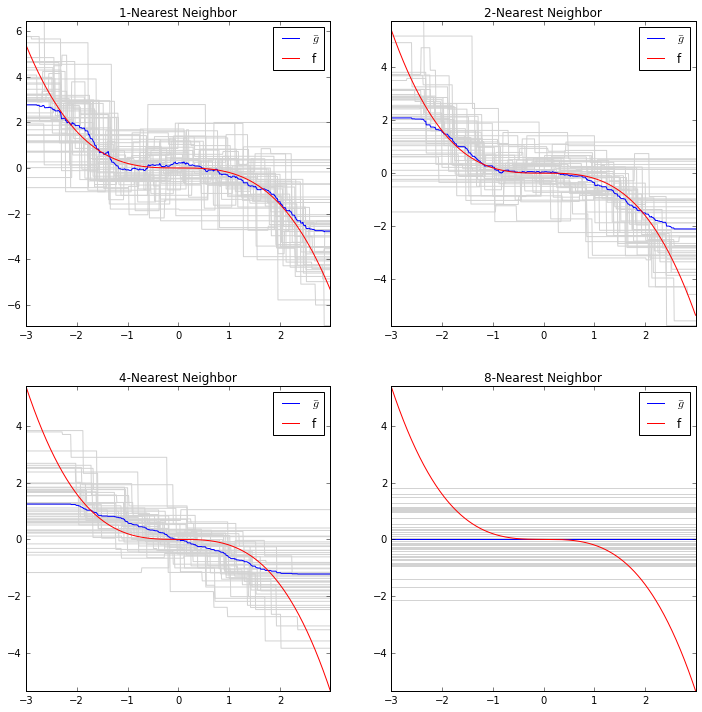

In [4]:
from sklearn import neighbors

x_range = np.arange(xmin,xmax,0.01)
n_test = len(x_range)

ks = [1,2,3,4,5,6,7,8]

plt.figure(figsize=(10,10))
_, ((p1, p2), (p3, p4)) = plt.subplots(2,2, figsize=(12,12))
subplots = [p1,p2,p3,p4]

tsets = 50
predictions = np.zeros((len(ks), tsets, n_test))
noisefree_p = np.zeros((len(ks), tsets, n_test))
means =  np.zeros((len(ks), n_test))

for j in range(tsets):
    (x, fx) = make_data(f=f, n=n, min=xmin, max=xmax, sigma=sigma)
    
    for i, k in enumerate(ks):
        knn = neighbors.KNeighborsRegressor(k, weights='uniform')
        y_        = knn.fit(x[:,np.newaxis], fx).predict(x_range[:,np.newaxis])
        noisefree = knn.fit(x[:,np.newaxis], f(x)).predict(x_range[:,np.newaxis])
        
        if k in [1,2,4,8]:
            subplots[int(np.log2(k))].plot(x_range, y_, c='lightgray')
        
        means[i] += y_
        predictions[i][j] = y_
        noisefree_p[i][j] = noisefree

print predictions[0].shape
        
for i, k in enumerate(ks):
    means[i] = means[i] / tsets
    
for i, k in enumerate([1,2,4,8]):
    subplots[i].plot(x_range, means[k-1], c='blue', label='$\\bar{g}$')        
    subplots[i].plot(x_range, f(x_range), c='red', label='f')
    subplots[i].set_title("%i-Nearest Neighbor" % (k))
    subplots[i].legend()
    subplots[i].axis('tight')

plt.show()

pass

Now we can estimate bias and variance for the models that we trained.  Recall that:

$$
\begin{align}
\mathrm{E}_{\mathcal{D}} \left[ \mathrm{EPE}(g) \right] 
&= \mathrm{E}_x \left[ 
\underbrace{\mathrm{E}_{\mathcal{D}} \left[ \left( g^{(\mathcal{D})}(x) - \bar{g}(x) \right)^2 \right]}_{variance} + 
\underbrace{\left( \bar{g}(x) -f(x) \right) ^2 }_{bias^2}\right]
\end{align}
$$

We have all the pieces to estimate bias and variance:

- $g^{(\mathcal{D})}(x)$, is our $k$NN regression model.  We have one for each of 100 data sets $\mathcal{D}$.
- $\bar{g}(x)$, the average prediction for $x$, is the sample mean of all $g^{(\mathcal{D})}(x)$ over all of our data sets $\mathcal{D}$.
- $f(x) = -x^3$ is our target function.

Below we show the error, estimated variance, and estimated bias for each value of $k$.  We can see that the bias and variance estimates sum up to exactly the squared error.  Our predictions also line up: as $k$ increases, bias increases and variance decreases.

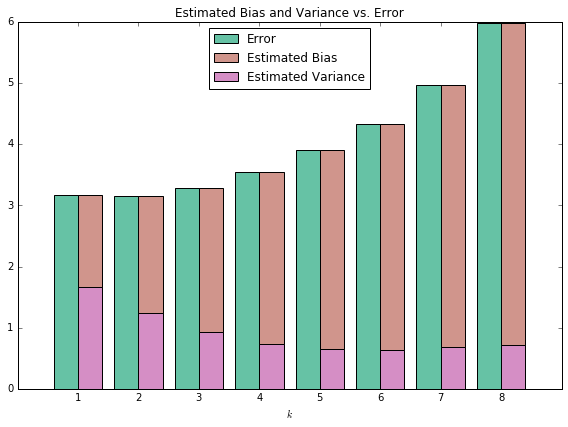

In [16]:
predictions = np.asarray(predictions)

plt.figure(figsize=(8,6))

errors = np.zeros(len(ks))
biases = np.zeros(len(ks))
variances = np.zeros(len(ks))

ks = np.asarray(ks)

noise = np.random.normal(0,sigma,n_test)
targets = f(x_range) + noise

for i, k in enumerate(ks):
    errors[i] = np.mean((predictions[i] - targets)**2)
    biases[i] = np.mean((means[i] - targets)**2)
    variances[i] = np.mean(np.var(predictions[i], axis=0))
cmap = cm.Set2
err_bar  = plt.bar(ks-0.4, errors, width=0.4, color=cmap(0))
bias_bar = plt.bar(ks, biases, bottom=variances, width=0.4, color=cmap(0.2))
var_bar  = plt.bar(ks, variances, width=0.4, color=cmap(0.4))

plt.title('Estimated Bias and Variance vs. Error')
plt.xticks(ks)
plt.xlabel('$k$')
plt.tight_layout()
plt.legend((err_bar[0], bias_bar[0], var_bar[0]), 
           ('Error', 'Estimated Bias', 'Estimated Variance'), 
           loc='upper center')
#plt.ylim(0,1)

How do these estimates compare with the theory?  Recall that the breakdown of error was calculated to be:
    
$$
\begin{align}
\mathrm{E}_{\mathcal{D}} \left[ \mathrm{EPE}(g) \right] 
&= \underbrace{\mathrm{E}_x \left[ \left(h(x) - \frac{1}{k} \sum_i^k h(x_i) \right)^2 \right]}_{(\text{model bias})^2}
+ \underbrace{\frac{\sigma^2}{k}}_{\mathrm{variance}}
+ \underbrace{\sigma^2}_{\text{irreducible error}} \\
\end{align}
$$

This used the strong assumption that the neighbors $x_i$ would remain fixed.  This assumption underestimates variance due to differences in the training set $\mathcal{D}$.  Potentially, it increases bias by not allowing biases for a single $\mathcal{D}$ to be averaged out over all training sets.

Below we see the comparison between the estimated and theoretical values for bias and variance.  Since the irreducible error term fell out of the bias term, it should be considered a type of (uncorrectable) bias.  

As expected, the assumption of fixed neighbors causes our theoretical variance to be much lower than the estimated variance.  The bias of the real nearest-neighbor models are also much lower than is expected with this assumption.  Nevertheless, for both the theoretical and estimated models, the bias increases and variance decreases with increasing $k$.

Can you derive the true bias and variance for nearest neighbors regression?  The only expressions I can find online are those which assume fixed neighbors!

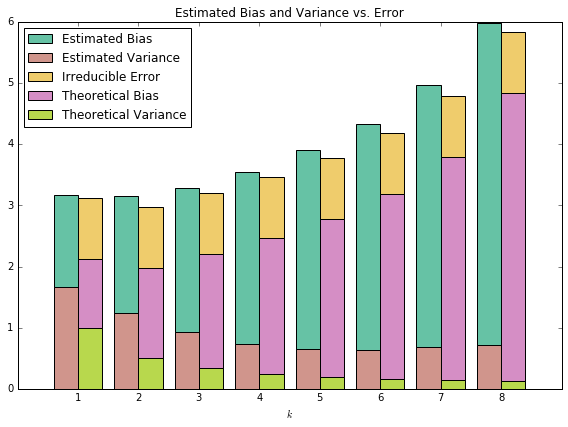

In [24]:
plt.figure(figsize=(8,6))

# theoretical values
t_biases = np.zeros(len(ks))
t_vars = (sigma**2)/ks
t_errs = [sigma**2] * len(ks)

for i, k in enumerate(ks):
    t_biases[i] = np.mean((f(x_range) - noisefree_p[i])**2)

bias_bar = plt.bar(ks-0.4, biases, bottom=variances, width=0.4, color=cmap(0))
var_bar  = plt.bar(ks-0.4, variances, width=0.4, color=cmap(0.2))

t_bias_bar = plt.bar(ks, t_biases, bottom=t_vars, 
                     width=0.4, color=cmap(0.4))
t_var_bar  = plt.bar(ks, t_vars, 
                     width=0.4, color=cmap(0.6))
t_err_bar  = plt.bar(ks, t_errs, bottom=(t_vars+t_biases), 
                     width=0.4, color=cmap(0.8))

plt.title('Estimated Bias and Variance vs. Error')
plt.xticks(ks)
plt.xlabel('$k$')
plt.tight_layout()
plt.legend((bias_bar[0], var_bar[0], t_err_bar[0], t_bias_bar[0], t_var_bar[0]), 
           ('Estimated Bias', 'Estimated Variance', 
            'Irreducible Error', 'Theoretical Bias', 
            'Theoretical Variance'), loc='upper left')
#plt.ylim(0,1)

Acknowledgements
----------------

The bias-variance decomposition above is taken from lecture 8 of Professor Yaser Abu-Mostafa's excellent machine learning course.